In [1]:
import pandas as pd
import numpy as np,os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings # Ignores any warning
warnings.filterwarnings("ignore")


In [2]:
os.chdir('C:\Machine Learning\Raw Data')

In [3]:
os.listdir()

['Bigmart_sale_test.csv',
 'Bigmart_sale_train.csv',
 'random_forest_regression_model.pkl']

In [44]:
train=pd.read_csv('Bigmart_sale_train.csv')

In [45]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [46]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [47]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [48]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [49]:
train.shape[0]

8523

In [50]:
train['Item_Identifier'].duplicated().sum()

6964

In [51]:
idsTotal = train.shape[0]
idsDupli = train[train['Item_Identifier'].duplicated()]
print(f'There are {len(idsDupli)} duplicate IDs for {idsTotal} total entries')

There are 6964 duplicate IDs for 8523 total entries


This shows that our Item_Identifier has some duplicate values. since a product can exist in more than one store it is expected for this repetition.

## Univariate Analysis
In Univariate analysis we will explore each variable in a dataset

<Figure size 1440x504 with 0 Axes>

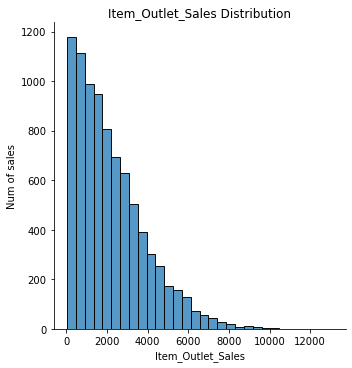

<Figure size 1440x504 with 0 Axes>

In [52]:
sns.displot(train.Item_Outlet_Sales,bins=30)
plt.xlabel('Item_Outlet_Sales')
plt.ylabel('Num of sales')
plt.title("Item_Outlet_Sales Distribution")
plt.figure(figsize=(20,7))

variable is skewed towards the right

In [53]:
train.Item_Outlet_Sales.skew()

1.1775306028542796

In [54]:
print('skew is=',train.Item_Outlet_Sales.skew())

skew is= 1.1775306028542796


In [55]:
print('kurt is=',train.Item_Outlet_Sales.kurt())

kurt is= 1.6158766814287264


We can see that our target variable is skewed towards the right. Therefore, we have to normalize it.

In [56]:
num_features=train.select_dtypes(include=[np.number])
num_features

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.300,0.016047,249.8092,1999,3735.1380
1,5.920,0.019278,48.2692,2009,443.4228
2,17.500,0.016760,141.6180,1999,2097.2700
3,19.200,0.000000,182.0950,1998,732.3800
4,8.930,0.000000,53.8614,1987,994.7052
...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834
8519,8.380,0.046982,108.1570,2002,549.2850
8520,10.600,0.035186,85.1224,2004,1193.1136
8521,7.210,0.145221,103.1332,2009,1845.5976


In [17]:
num_features.dtypes

Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
dtype: object

out of 12 we have only 5 numeric variables.

### Correlation between Numerical Predictors and Target variable

In [18]:
corr=num_features.corr()

In [19]:
corr['Item_Outlet_Sales'].sort_values(ascending=False)

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Item_Weight                  0.014123
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.128625
Name: Item_Outlet_Sales, dtype: float64

We can observe from the above that Item MRP has the highest positive correlation with our target variable, whereas Item Visibility has the lowest. This is in stark contrast to our earlier hypothesis, which predicted that this variable would have a significant impact on sales growth. Nonetheless, because this isn't typical behaviour, we should look into it.

## Categorical Predictors

#### Distribution of the variable Item_Fat_Content

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

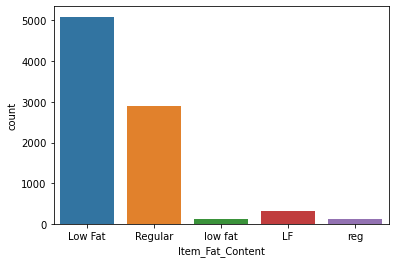

In [57]:
sns.countplot(train.Item_Fat_Content)

There are two types of Item Fat Content: "Low Fat" and "Regular." However, it is written differently in our data. This will be rectified.

#### Distribution of the variable Item_Type

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Dairy'),
  Text(1, 0, 'Soft Drinks'),
  Text(2, 0, 'Meat'),
  Text(3, 0, 'Fruits and Vegetables'),
  Text(4, 0, 'Household'),
  Text(5, 0, 'Baking Goods'),
  Text(6, 0, 'Snack Foods'),
  Text(7, 0, 'Frozen Foods'),
  Text(8, 0, 'Breakfast'),
  Text(9, 0, 'Health and Hygiene'),
  Text(10, 0, 'Hard Drinks'),
  Text(11, 0, 'Canned'),
  Text(12, 0, 'Breads'),
  Text(13, 0, 'Starchy Foods'),
  Text(14, 0, 'Others'),
  Text(15, 0, 'Seafood')])

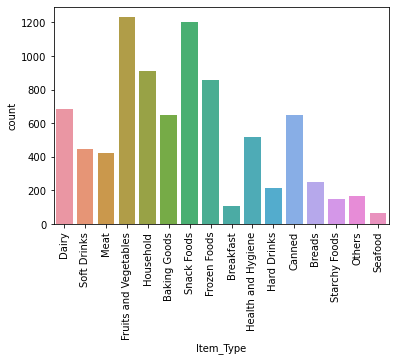

In [58]:
sns.countplot(train.Item_Type)
plt.xticks(rotation=90)

forItem_Type we have 16 different types of unique values and it is high number for categorical variable. Therefore we must try to reduce it.

#### Distribution of the variable Outlet_Size

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

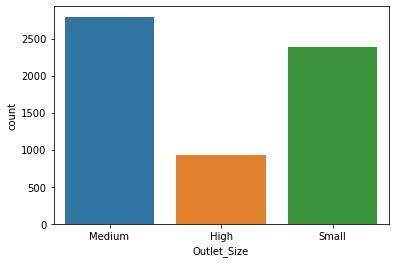

In [59]:
sns.countplot(train.Outlet_Size)

There appears to be a less amount of stores with a size of "High." It will be fascinating to watch how this variable affects our goal.

#### Distribution of the variable Outlet_Location_Type

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

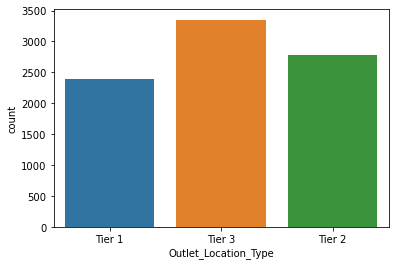

In [60]:
sns.countplot(train.Outlet_Location_Type)

#### Distribution of the variable Outlet_Location_Type

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Supermarket Type1'),
  Text(1, 0, 'Supermarket Type2'),
  Text(2, 0, 'Grocery Store'),
  Text(3, 0, 'Supermarket Type3')])

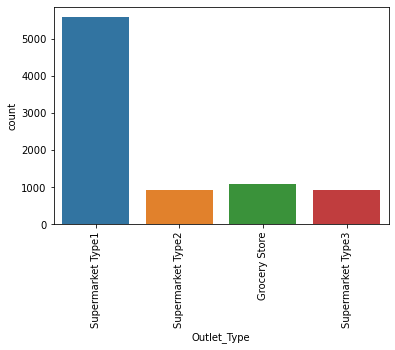

In [61]:
sns.countplot(train.Outlet_Type)
plt.xticks(rotation=90)

Because it appears that Supermarket Type 2, Grocery Store, and Supermarket Type 3 all have a small number of stores, we can combine them into a single category, but first we must examine their impact on the target variable.

## Bivariate Analysis
Now it time to see the relationship between our target variable and predictors.

#### Numerical Variables

#### Item_Weight and Item_Outlet_Sales analysis

Text(0.5, 1.0, 'Item_Weight vs Item_Outlet_Sales ')

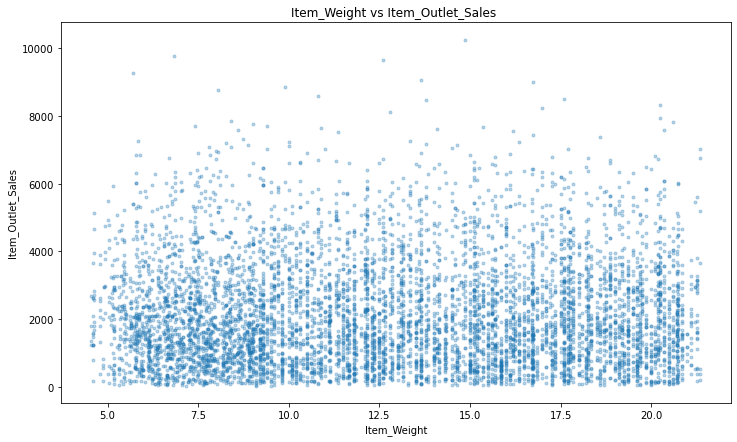

In [62]:
plt.figure(figsize=(12,7))
plt.plot(train.Item_Weight,sale['Item_Outlet_Sales'],'.', alpha = 0.3)
plt.xlabel('Item_Weight')
plt.ylabel('Item_Outlet_Sales')
plt.title('Item_Weight vs Item_Outlet_Sales ')

We saw previously that Item_Weight had a low correlation with our target variable. This plot shows there relation.

#### Item_Visibility and Item_Outlet_Sales analysis

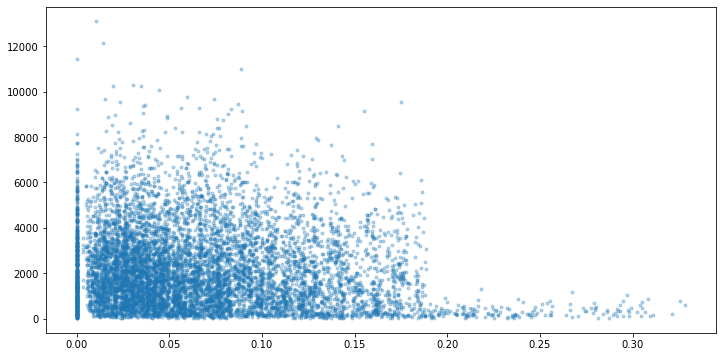

In [63]:
plt.figure(figsize=(12,6))
plt.plot(train.Item_Visibility,sale["Item_Outlet_Sales"],".",alpha=.3)

In [64]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

<BarContainer object of 8523 artists>

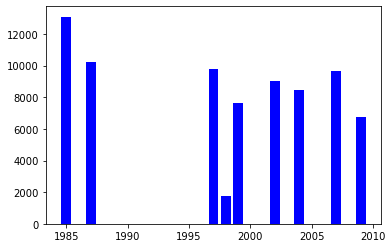

In [28]:
plt.bar("Outlet_Establishment_Year", "Item_Outlet_Sales", data = sale, color = "blue")

#### Outlet_Establishment_Year and Item_Outlet_Sales analysis

In [65]:
Outlet_Establishment_Year_pivot=train.pivot_table(index='Outlet_Establishment_Year',values='Item_Outlet_Sales',aggfunc=np.mean,)
Outlet_Establishment_Year_pivot

,Item_Outlet_Sales
Outlet_Establishment_Year,
1985,2483.677474
1987,2298.995256
1997,2277.844267
1998,339.351662
1999,2348.354635
2002,2192.384798
2004,2438.841866
2007,2340.675263
2009,1995.498739


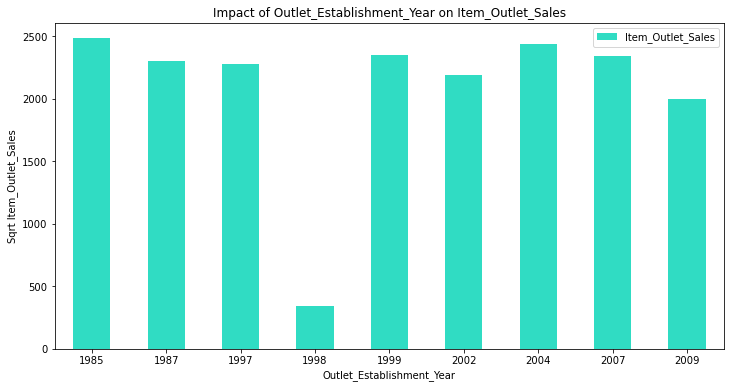

In [30]:
Outlet_Establishment_Year_pivot.plot.bar(color='#30DCC3',figsize=(12,6))
plt.xlabel("Outlet_Establishment_Year")
plt.ylabel("Sqrt Item_Outlet_Sales")
plt.title("Impact of Outlet_Establishment_Year on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

There seems to be no appreciable meaning between the year of store establishment and the sales for the items

## Categorical Variables
Impact of Item_Fat_Content onItem_Outlet_Sales

In [66]:
Item_Fat_Content_pivot=train.pivot_table(index='Item_Fat_Content',values='Item_Outlet_Sales', aggfunc='mean')
Item_Fat_Content_pivot

,Item_Outlet_Sales
Item_Fat_Content,
LF,2073.551928
Low Fat,2164.477336
Regular,2235.186702
low fat,2087.740737
reg,1962.192268


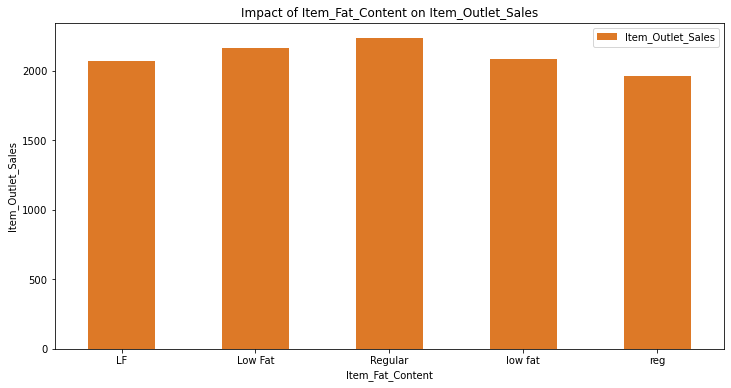

In [32]:
Item_Fat_Content_pivot.plot.bar(color='#DD7927',figsize=(12,6))

plt.xlabel("Item_Fat_Content")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Item_Fat_Content on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

Low Fat products seem to higher sales than the Regular products

#### Impact of Outlet_Identifier on Item_Outlet_Sales

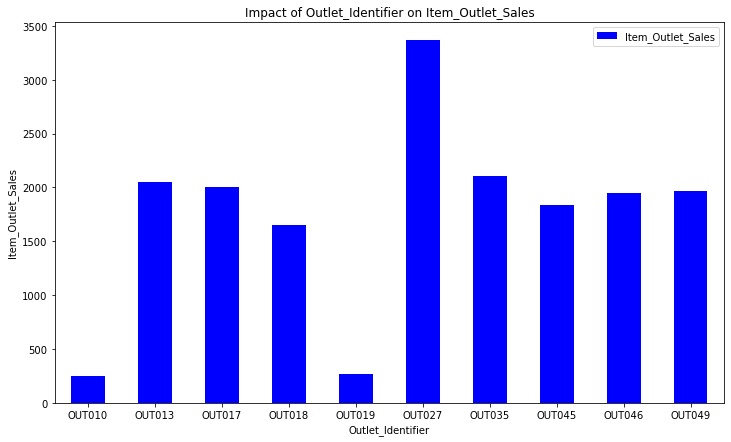

In [67]:
Outlet_Identifier_pivot = train.pivot_table(index='Outlet_Identifier', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Identifier_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Outlet_Identifier")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Identifier on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

In [68]:
train.pivot_table(values='Outlet_Type',columns='Outlet_Identifier',aggfunc=lambda x:x.mode())

Outlet_Identifier,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type1,Supermarket Type2,Grocery Store,Supermarket Type3,Supermarket Type1,Supermarket Type1,Supermarket Type1,Supermarket Type1


In [69]:
train.pivot_table(values='Outlet_Type',
                  columns='Outlet_Size',
                  aggfunc=lambda x:x.mode())

Outlet_Size,High,Medium,Small
Outlet_Type,Supermarket Type1,Supermarket Type3,Supermarket Type1


Most of the stores are of Supermarket Type1 of size High and they do not have best results. whereas Supermarket Type3 (OUT027) is a Medium size store and have best results.

#### Impact of Outlet_Size on Item_Outlet_Sales

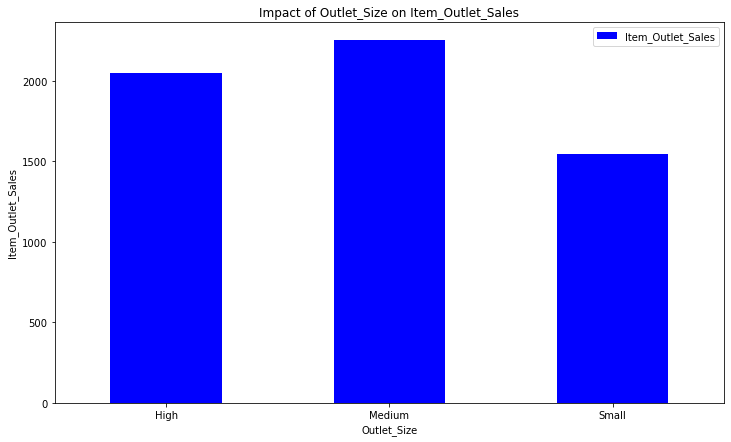

In [70]:
Outlet_Size_pivot = sale.pivot_table(index='Outlet_Size', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Size_pivot.plot(kind='bar', color='blue',figsize=(12,7))

plt.xlabel("Outlet_Size")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Size on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

#### Impact of Outlet_Type on Item_Outlet_Sales

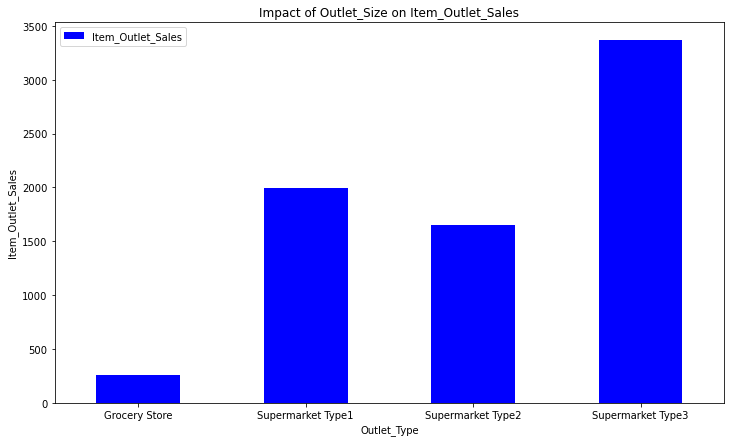

In [72]:
Outlet_Type_pivot = train.pivot_table(index='Outlet_Type', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Type_pivot.plot(kind='bar', color='blue',figsize=(12,7))

plt.xlabel("Outlet_Type")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Size on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

It could be a good idea to create a new feature that shows the sales ratio according to the store size

#### Impact of Outlet_Location_Type on Item_Outlet_Sales

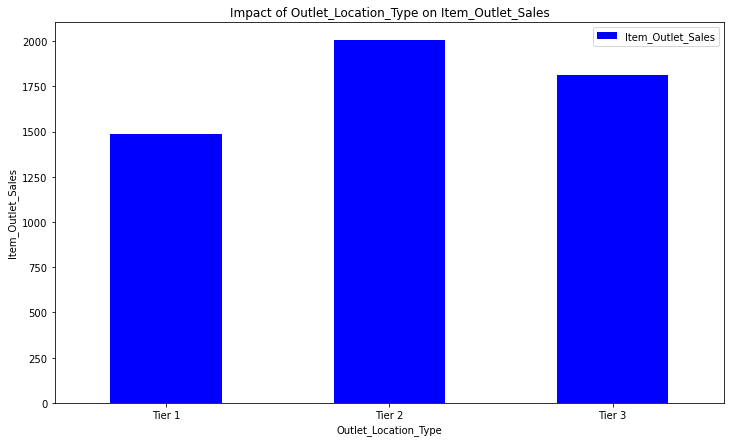

In [73]:
Outlet_Location_Type_pivot = sale.pivot_table(index='Outlet_Location_Type', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Location_Type_pivot.plot(kind='bar', color='blue',figsize=(12,7))

plt.xlabel("Outlet_Location_Type")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Location_Type on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

This shows that our hypotheses was totaly different from the result that we got from the above plot. Tier 2 cities have the higher sales than the Tier 1 and Tier 2.

In [75]:
train.pivot_table(values='Outlet_Location_Type',
                  columns='Outlet_Type',
                  aggfunc=lambda x:x.mode())

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Location_Type,Tier 3,Tier 2,Tier 3,Tier 3


In [76]:
test=pd.read_csv('Bigmart_sale_test.csv')

## Data Pre-Processing
During our EDA we were able to take some Insights regarding our first hypotheses and the available data.


#### 2. 1. Looking for missing values
We have two datasets the first one train.csv and the second is test.csv. Let’s combine them into a dataframe data with a source column specifying where each observation belongs, so that we don’t have to do pre-processing separately.

In [84]:
#Join Train and Test Dataset

#Create source column to later separate the data easily
train['source']='train'
test['source']='test'
data = pd.concat([train,test], ignore_index = True)
print(train.shape, test.shape, data.shape)

(8523, 13) (5681, 12) (14204, 13)


In [88]:
data.isnull().sum()/data.shape[0]*100

Item_Identifier               0.000000
Item_Weight                  17.171219
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.273726
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales            39.995776
source                        0.000000
dtype: float64

Note that Item_Outlet_Sales is the target variable and contains missing values because our test data does not have the Item_Outlet_Sales column.
Nevertheless, we’ll impute the missing values in Item_Weight and Outlet_Size.

## Imputing Missing Values
In our EDA section, we have seen that the Item_Weight and the Outlet_Size had missing values.
In our EDA section, we have seen that the Item_Weight and the Outlet_Size had missing values.

#### Imputing the mean for Item_Weight missing values

In [99]:
data.fillna(data['Item_Weight'].mean(), inplace=True)

In [100]:
data['Item_Weight'].isnull().sum()

0

In [106]:
item_avg_weight=data.pivot_table(values='Item_Weight',index='Item_Identifier')
print(item_avg_weight)

                 Item_Weight
Item_Identifier             
DRA12              11.732539
DRA24              18.038571
DRA59               9.174571
DRB01               8.740714
DRB13               6.856984
...                      ...
NCZ30               7.830571
NCZ41              18.967857
NCZ42              10.958571
NCZ53               9.954762
NCZ54              14.278571

[1559 rows x 1 columns]


In [103]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'source'],
      dtype='object')

In [ ]:
def item_weight(cols):
    weight=cols[0]
    Identifier =cols[1]
    
    if pd.isnull(weight)

In [107]:
def impute_weight(cols):
    Weight = cols[0]
    Identifier = cols[1]
    
    if pd.isnull(Weight):
        return item_avg_weight['Item_Weight'][item_avg_weight.index == Identifier]
    else:
        return Weight

In [108]:
print ('Orignal #missing: %d'%sum(data['Item_Weight'].isnull()))
data['Item_Weight'] = data[['Item_Weight','Item_Identifier']].apply(impute_weight,axis=1).astype(float)
print ('Final #missing: %d'%sum(data['Item_Weight'].isnull()))

Orignal #missing: 0
Final #missing: 0


#### Impute Outlet size with mode

In [109]:
from scipy.stats import mode

#Determing the mode for each
outlet_size_mode = data.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=lambda x:x.mode())
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,12.792854,Small,Medium,Medium


In [110]:
def impute_size_mode(cols):
    Size = cols[0]
    Type = cols[1]
    if pd.isnull(Size):
        return outlet_size_mode.loc['Outlet_Size'][outlet_size_mode.columns == Type][0]
    else:
        return Size

print ('Orignal #missing: %d'%sum(data['Outlet_Size'].isnull()))
data['Outlet_Size'] = data[['Outlet_Size','Outlet_Type']].apply(impute_size_mode,axis=1)
print ('Final #missing: %d'%sum(data['Outlet_Size'].isnull()))

Orignal #missing: 0
Final #missing: 0


## Feature Engineering

Combine Outlet Type

In [111]:
data.pivot_table(values='Item_Outlet_Sales', columns='Outlet_Type')


Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Item_Outlet_Sales,209.014242,1394.974532,1202.929375,2220.595762


we are not going to combine because the average product sale are different.

#### Item_Visibility minimum value is 0

In our EDA we observe that Item_Visibility had minimum value 0. so this make no sense, lets consider it as missing value and impute with its mean.

In [112]:
#Determine average visibility of a product
visibility_avg = data.pivot_table(values='Item_Visibility', index='Item_Identifier')

#Impute 0 values with mean visibility of that product
missing_values = (data['Item_Visibility'] == 0)

print ('Number of 0 values initially: %d'%sum(missing_values))

data.loc[missing_values,'Item_Visibility'] = data.loc[missing_values,'Item_Identifier'].apply(lambda x: visibility_avg.at[x, 'Item_Visibility'])

print ('Number of 0 values after modification: %d'%sum(data['Item_Visibility'] == 0))

Number of 0 values initially: 879
Number of 0 values after modification: 0


#### Determine the years of operation of a store

In [114]:
#Remember the data is from 2013
data['Outlet_Years'] = 2022 - data['Outlet_Establishment_Year']
data['Outlet_Years'].describe()

count    14204.000000
mean        24.169319
std          8.371664
min         13.000000
25%         18.000000
50%         23.000000
75%         35.000000
max         37.000000
Name: Outlet_Years, dtype: float64

#### Create a broad category of Item_Type

Item_Type is having 16 unique categories which might to be very useful in our analysis. So it’s a good idea to combine them. Take a close look at Item_identifier each item starts with FD” (Food), “DR” (Drinks) or “NC” (Non-Consumables). We can group the items within these 3 categories.

In [116]:
#Get the first two characters of ID:
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])

#Rename them to more intuitive categories:
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food','NC':'Non-Consumable',                                                            
              'DR':'Drinks'})
data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

#### Modify categories of Item_Fat_Content

Here we are correcting the Typos in categories of Item_Fat_Content variable.

In [117]:
#Change the category of low fat
print('Original Categories:')
print(data['Item_Fat_Content'].value_counts())

print('\nModified categories')
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat',
                                  'low fat':'Low Fat',
                                  'reg':'Regular'})

print(data['Item_Fat_Content'].value_counts())

Original Categories:
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Modified categories
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


In [118]:
#Mark non-consumables as separate category in low_fat:

data.loc[data['Item_Type_Combined'] == 
"Non-Consumable", "Item_Fat_Content"] = "Non-Edible"
data['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64